<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective in this excersize is analyze a dataset by performing PCA and linear regression.

Complete the relevant code after the corresponding cells.

Then upload the notebook to elearn.

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

Load the california housing dataset

In [2]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
data = df.to_numpy()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Visualize the data e.g. *correlation matrices*, *scatterplots*, something else


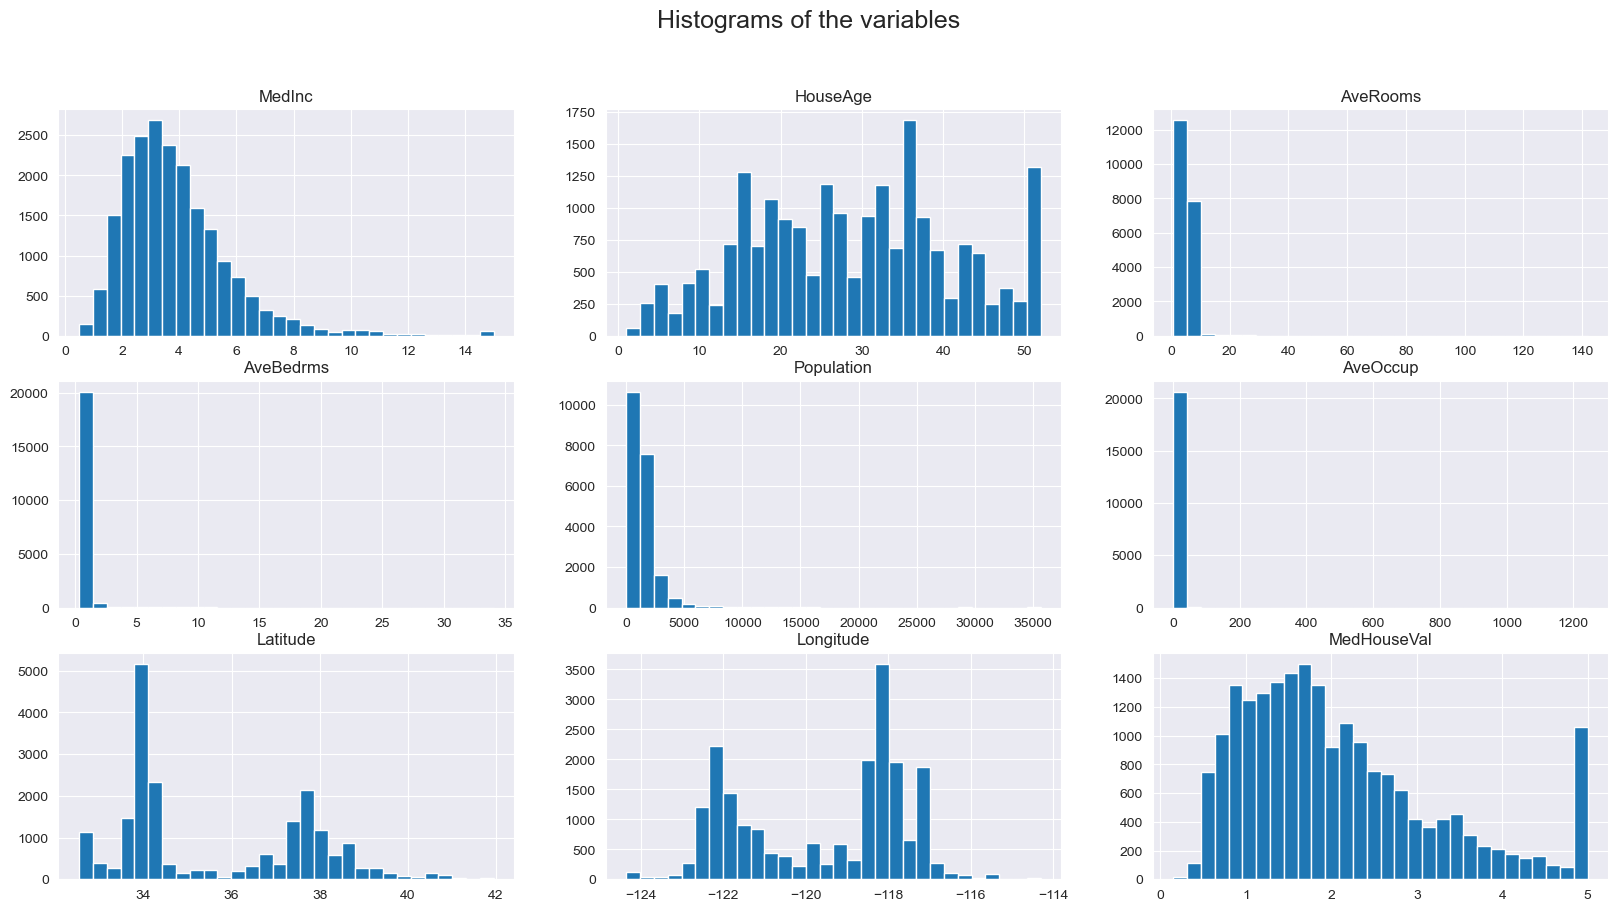

In [3]:
# create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# plot histograms of each all variables
for ax, col in zip(axes.flatten(), df.columns):
    ax.hist(df[col], bins=30)
    ax.set_title(col)

fig.suptitle('Histograms of the variables', fontsize=18)

plt.show()

As we can observe from the histograms, the variables are not normally distributed. We also observe outliers in the  independent variables AveRooms, AveBedrms, AveOccup and also on the dependent variable MedHouseVal.

We can also observe that the variables are not on the same scale. We will need to standardize the variables before performing PCA or any regression analysis.

Let's check the correlation matrix

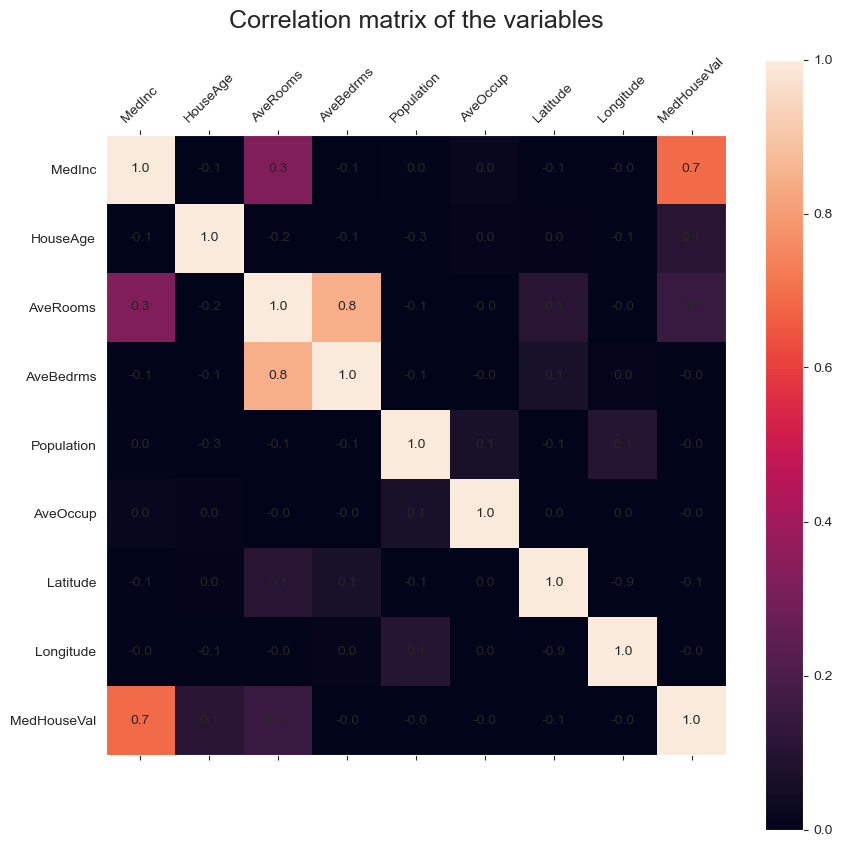

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=0, vmax=1, interpolation='none')
ax.set_title('Correlation matrix of the variables', fontsize=18, pad=20)
for (i, j), z in np.ndenumerate(df.corr()):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
# add a colorbar to the ax
plt.colorbar(cax, ax=ax)

# Adjust tick positions and labels to add spaces between columns
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)  
ax.set_yticks(ticks)  
ax.set_xticklabels(df.columns, rotation=45)
ax.set_yticklabels(df.columns)  

# turn the grid off
ax.grid(False)
plt.show()

We see that the independent variables AveRooms and AveBedrms are highly correlated. This suggests a problem, since Multicollinearity makes it difficult to estimate the variables' individual regression coefficients reliably.

To combat this, we can use PCA to infer new features that are uncorrelated with each other, we can also decide to drop one of the two variables, or we can use a regression model that is resilient to multicollinearity, such as the Ridge or Lasso regression, or Elastic Net, a combination of the 2.
 
We also observe that the dependent variable MedHouseVal is highly correlated with the independent variable MedInc, suggesting a strong link between the 2.

In [5]:
# create train and test split
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
y = df['MedHouseVal']
X = df.drop(columns=['MedHouseVal'])

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline to search for the best combination of PCA components
scaler = StandardScaler()
pca = PCA()
lin_reg = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lin_reg', lin_reg)])


# Define the grid of parameters to search
param_grid = {
    'pca__n_components': range(1, 9)  # Keeping the original range for PCA components
}

# Perform the grid search
LinRegPCA_CV = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, scoring='r2')
%time LinRegPCA_CV.fit(X_train, y_train)

# Output the best CV score and parameters
print("Best CV score = %0.3f:" % LinRegPCA_CV.best_score_)
print("Best parameters: ", LinRegPCA_CV.best_params_)

# score on the test set
print("Test score = %0.3f" % LinRegPCA_CV.score(X_test, y_test))

CPU times: total: 46.9 ms
Wall time: 338 ms
Best CV score = 0.611:
Best parameters:  {'pca__n_components': 8}
Test score = 0.576


In [ ]:
# implement a pipeline for support vector regression
from sklearn.svm import SVR

# pipeline is scaling and then applying the support vector regressor
pipe = Pipeline(steps=[('scaler', scaler), ('svr', SVR())])

# Define the grid of parameters to search
param_grid = {
    'svr__kernel': ['poly'],
    'svr__degree': [2, 3, 4, 5, 10],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.2, 0.5, 0.8, 1],
    'svr__gamma': ['scale', 'auto']
}

# Perform the grid search
SVR_CV = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, scoring='r2')
%time SVR_CV.fit(X_train, y_train)

# Output the best CV score and parameters
print("Best CV score = %0.3f:" % SVR_CV.best_score_)
print("Best parameters: ", SVR_CV.best_params_)

# score on the test set
print("Test score = %0.3f" % SVR_CV.score(X_test, y_test))

In [115]:
# implement a pipeline for gradient boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# pipeline is scaling and then applying the gradient boosting regressor
pipe = Pipeline(steps=[('scaler', scaler), ('gb', HistGradientBoostingRegressor())])

# Define the grid of parameters to search
param_grid = {
    'gb__max_iter': [100, 200, 300],
    'gb__max_depth': [None, 5, 10, 20, 25, 30, 35],
    'gb__learning_rate': [0.01, 0.1, 0.2, 0.25],
    'gb__l2_regularization': [0, 0.1, 0.5, 1],
    'gb__max_leaf_nodes': [31, 50, 100, 200, 300, 400, 500],
    'gb__min_samples_leaf': [20, 50, 100, 200, 300, 400, 500]
}

# Perform the grid search
GradBoost_CV = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, scoring='r2')
%time GradBoost_CV.fit(X_train, y_train)

# Output the best CV score and parameters
print("Best CV score = %0.3f:" % GradBoost_CV.best_score_)
print("Best parameters: ", GradBoost_CV.best_params_)

CPU times: total: 5min 51s
Wall time: 5h 27min 20s
Best CV score = 0.715:
Best parameters:  {'gb__l2_regularization': 0.1, 'gb__learning_rate': 0.25, 'gb__max_depth': 5, 'gb__max_iter': 100, 'gb__max_leaf_nodes': 500, 'gb__min_samples_leaf': 200}


In [85]:
def plot_cv_results(cv_results, scoring_metric):
    """
    Plots the cross-validation results from a GridSearchCV object.

    Parameters:
    - cv_results: the `cv_results_` attribute from a fitted GridSearchCV object.
    - scoring_metric: the scoring metric used in GridSearchCV. It should match one of the keys in cv_results
                      related to the mean test scores for different hyperparameters.
    """
    # Extract the number of components and corresponding mean test scores
    n_components = cv_results['param_pca__n_components'].data.astype(int)
    mean_test_scores = cv_results[scoring_metric]

    # Check if the scoring metric is a 'loss', in which case lower is better and we want to flip the signs
    # Since we're plotting R2 scores here, we assume higher is better and do not flip the signs
    if 'neg_' in scoring_metric:
        mean_test_scores = -mean_test_scores

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(n_components, mean_test_scores, color='skyblue')
    plt.xlabel('Number of PCA Components')
    plt.ylabel(scoring_metric.capitalize())
    plt.title(f'{scoring_metric.capitalize()} vs. Number of PCA Components')
    plt.xticks(n_components)
    plt.show()

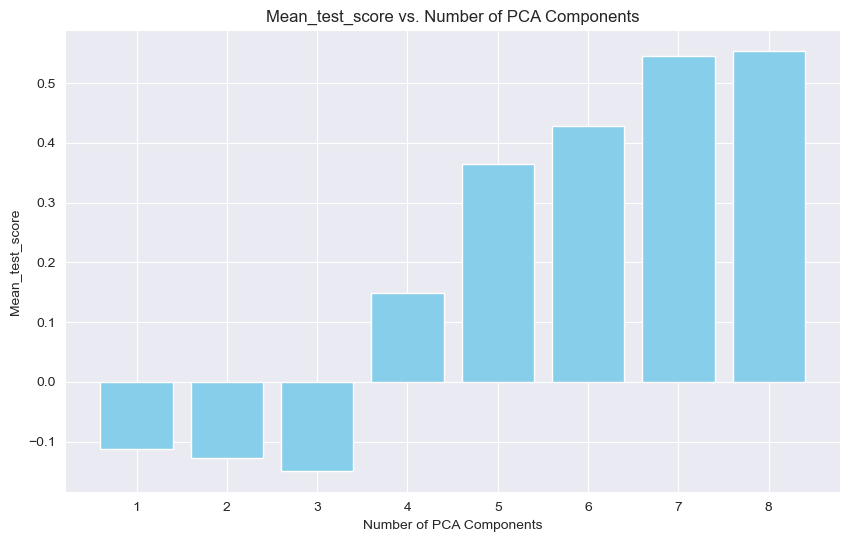

In [91]:
# Plot the R2 scores
plot_cv_results(search.cv_results_, 'mean_test_score')

We can see that the best number of PCA components is 8, which is the maximum number of components we tested. This suggests that the best model is the one that uses all the original features. This is not surprising, since the original features are not too many and the dataset is not too large. In general, PCA is more useful when the number of features is large, or when the features are highly correlated with each other.

Let's now train the model on the original features and compare the performance with the PCA model.

In [98]:
from sklearn.model_selection import cross_val_score
# define new pipeline
pipe = Pipeline(steps=[('scaler', scaler), ('lin_reg', lin_reg)])

# Perform cross-validation
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring="r2")  # cv=5 for 5-fold cross-validation

mean_score = cv_scores.mean()
confidence_interval = (cv_scores.mean() - 2 * cv_scores.std(), cv_scores.mean() + 2 * cv_scores.std())

print(f"Mean CV score = {mean_score:.3f}")
print(f"95% confidence interval of the score estimate: {confidence_interval}")


Mean CV score = 0.553
95% confidence interval of the score estimate: (0.429647911208891, 0.6764143168470217)


Let's continue by splitting the data into training and test sets and standardizing the features

The reason we transform the test data based on the training data is to avoid data leakage. If we standardize the test data based on the test data, we would be using information from the test data to standardize the test data, which would be a form of data leakage. We want to standardize the test data based on the training data, so that the test data is standardized in the same way as the training data.

More information on data leakage can be found [here](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['MedHouseVal']
X = df.drop(columns=['MedHouseVal'])

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perform PCA to reduce the number of features

In [76]:
from sklearn.decomposition import PCA

pca = PCA()

# fit the PCA model
pca.fit(X_train)

# transform the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Visualize the explained variance of the principal components

In [31]:
# sum of the explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.25313826 0.23403182 0.15917174 0.12976895 0.12547205 0.08216517
 0.01034161 0.00591041]


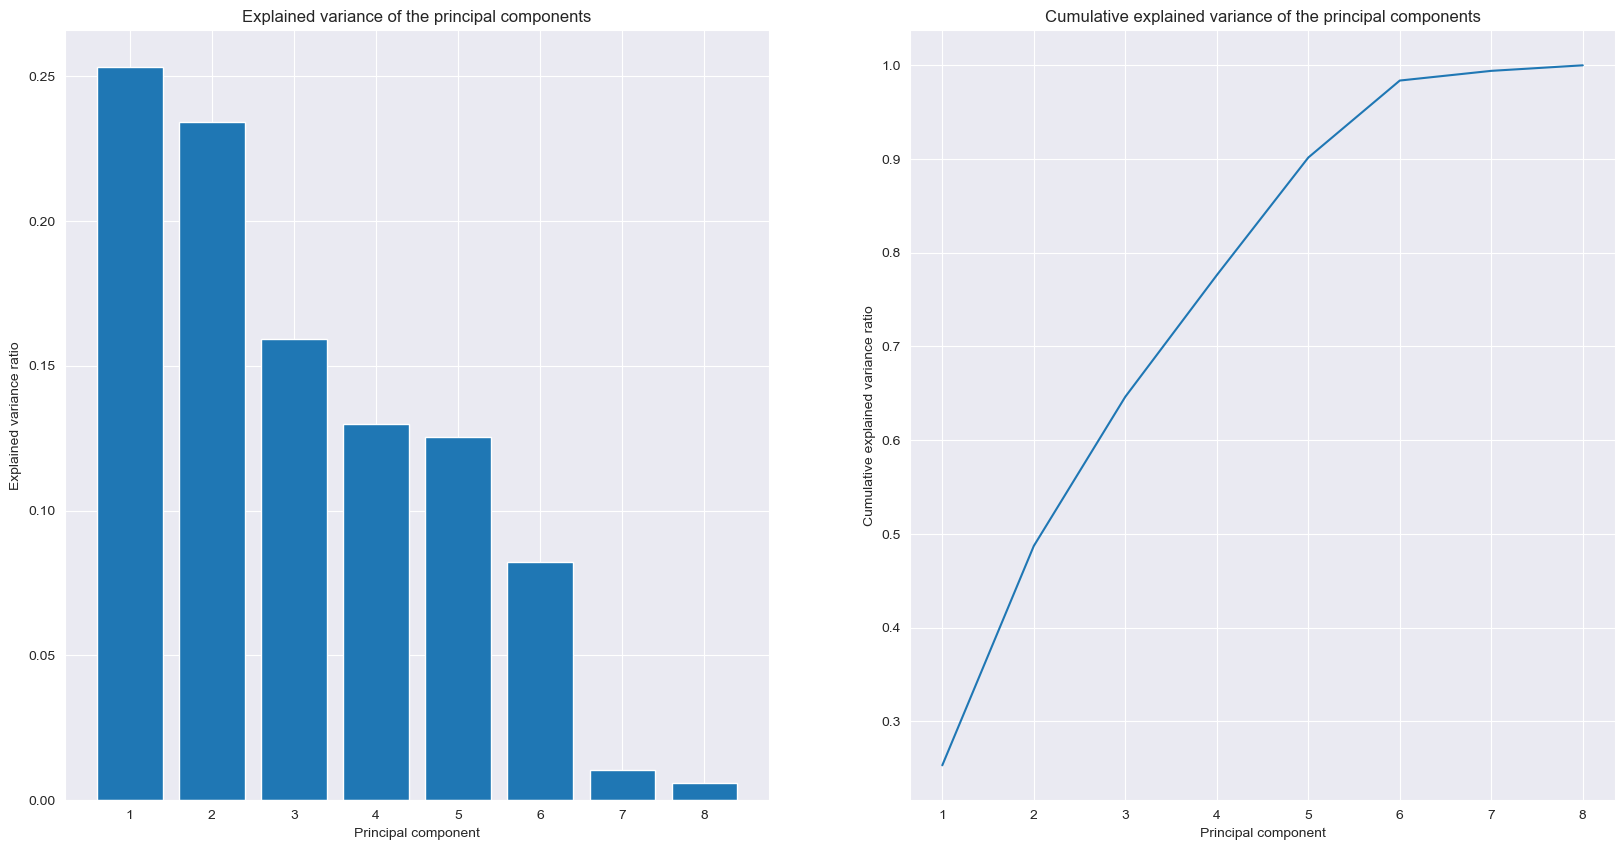

In [39]:
# create a 2 plot figure, one for the explained variance and one for the cumulative explained variance
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the explained variance in a bar plot
ax[0].bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
ax[0].set_title('Explained variance of the principal components')
ax[0].set_xlabel('Principal component')
ax[0].set_ylabel('Explained variance ratio')

# plot the cumulative explained variance in a line plot
ax[1].plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_title('Cumulative explained variance of the principal components')
ax[1].set_xlabel('Principal component')
ax[1].set_ylabel('Cumulative explained variance ratio')

plt.show()

provide scatterplots for the case of projections in 2 and 3 dimensions

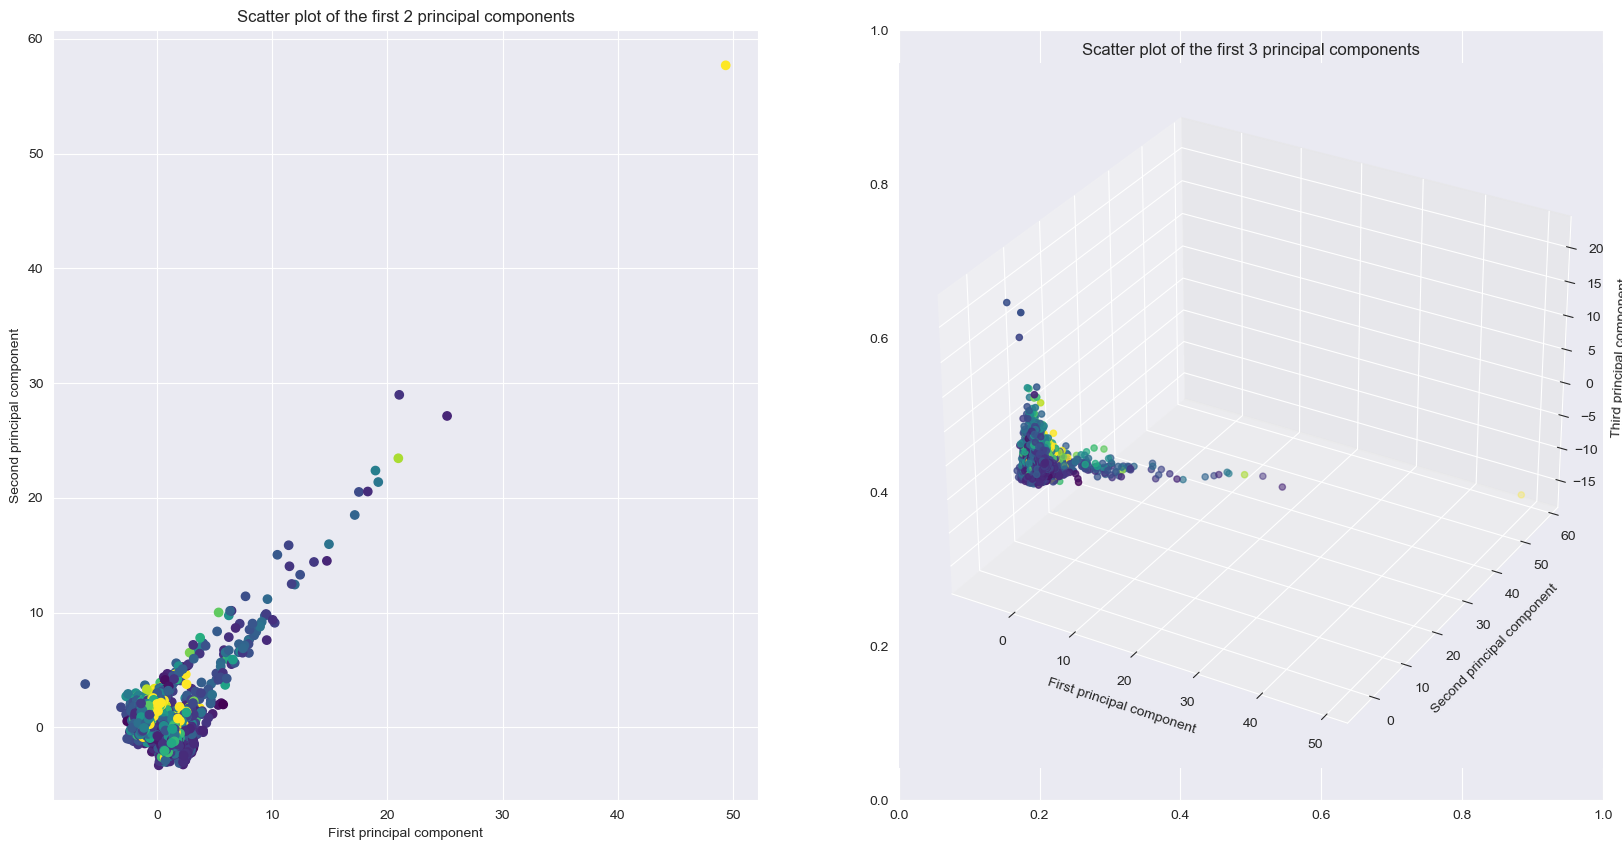

In [40]:
# create a 2 figure scatter plot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the scatter plot
ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
ax[0].set_title('Scatter plot of the first 2 principal components')
ax[0].set_xlabel('First principal component')
ax[0].set_ylabel('Second principal component')

# plot the 3D scatter plot
ax[1] = fig.add_subplot(122, projection='3d')
ax[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')
ax[1].set_title('Scatter plot of the first 3 principal components')
ax[1].set_xlabel('First principal component')
ax[1].set_ylabel('Second principal component')
ax[1].set_zlabel('Third principal component')

plt.show()

perform linear regression using the original features

In [77]:
lin_reg = LinearRegression()
# fit the linear regression model
lin_reg.fit(X_train, y_train)

# predict the target values
y_pred = lin_reg.predict(X_test)

# calculate the R^2 score
r2 = lin_reg.score(X_test, y_test)
print("R^2 score of the linear regression model using the original features: %0.3f" % r2)

R^2 score of the linear regression model using the original features: 0.576


perform linear regression using PCA-reduced features

In [73]:
X_train_pca.shape, X_test_pca.shape

((16512, 8), (4128, 8))

In [78]:

# fit the linear regression model
lin_reg.fit(X_train_pca, y_train)

# predict the target values
y_pred_pca = lin_reg.predict(X_test_pca)

# calculate the R^2 score
r2_pca = lin_reg.score(X_test_pca, y_test)
print("R^2 score of the linear regression model using the PCA-reduced features: %0.3f" % r2_pca)

R^2 score of the linear regression model using the PCA-reduced features: 0.576


Compare the perfornance of linear regression on the original vs the PCA features

Quantify the impact of the number of principal components on the regression
?